In [10]:
# Import dependencies
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [5]:
# Load csv into pandas dataframe
path = "Resources/data.csv"
df = pd.read_csv(path, encoding='ISO-8859-1')

In [6]:
# Preview DataFrame
df.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


In [79]:
# Summary statistics
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,"35,768.00","35,768.00","35,768.00","35,768.00","35,768.00","35,768.00","35,768.00"
mean,"943,296.25",3.28,2.53,"636,015.09",47.45,-98.42,"89,643.10"
std,"1,020,110.37",1.73,1.37,"1,120,015.63",3.33,22.28,"12,132.35"
min,"21,500.00",0.00,0.00,"63,382.00",42.28,-123.94,"62,400.00"
25%,"459,900.00",2.00,2.00,"109,167.00",43.87,-122.32,"82,000.00"
50%,"699,000.00",3.00,2.00,"242,460.00",49.02,-104.61,"89,000.00"
75%,"1,095,000.00",4.00,3.00,"522,888.00",49.89,-79.87,"97,000.00"
max,"37,000,000.00",109.00,59.00,"5,647,656.00",53.92,63.10,"133,000.00"


In [7]:
# Check dataframe for missing values
df.isnull().sum()

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

In [19]:
# Visualization 1: Map
# Create a map, using folium

# Group data by city
city_grouped = df.groupby('City').agg(
    avg_latitude=('Latitude', 'mean'),
    avg_longitude=('Longitude', 'mean'),
    avg_price=('Price', 'mean')
).reset_index()

# Create map object
mean_lat = city_grouped['avg_latitude'].mean()
mean_long = city_grouped['avg_longitude'].mean()
m = folium.Map(location=[mean_lat, mean_long], zoom_start=4)

# Add markers for each city
for index, row in city_grouped.iterrows():
    city = row['City']
    avg_latitude = row['avg_latitude']
    avg_longitude = row['avg_longitude']
    avg_price = row['avg_price']
    
    # Add a marker to the map
    folium.Marker(
        location=[avg_latitude, avg_longitude],
        popup=f"City: {city}\nAverage Price: ${avg_price:,.2f}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)


# Save map
m.save('canadian_house_prices_map.html')


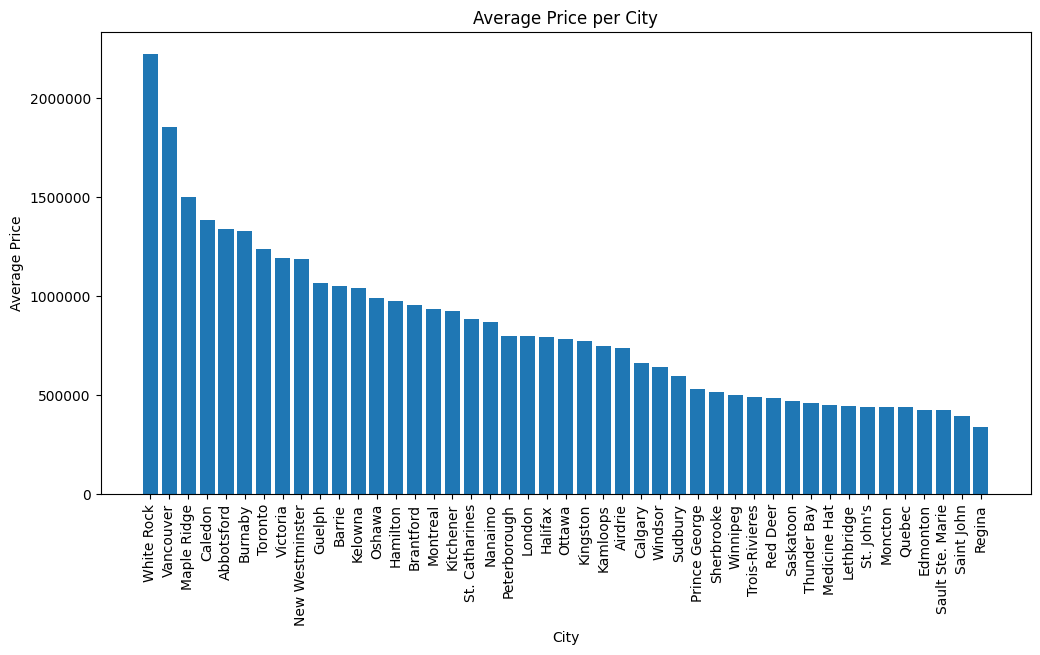

In [76]:
# Visualization 2: Average House Price per City
# Create a bar chart, showing the average house price per city

# Group data by city
city_grouped2 = df.groupby('City').agg(
    avg_price=('Price', 'mean')
    ).reset_index()

# Sort data
city_grouped2 = city_grouped.sort_values(by='avg_price', ascending=False)

# Plot data
plt.figure(figsize=(12, 6))
plt.bar(city_grouped2['City'], city_grouped2['avg_price'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Average Price per City')
plt.xticks(rotation=90)
plt.show()

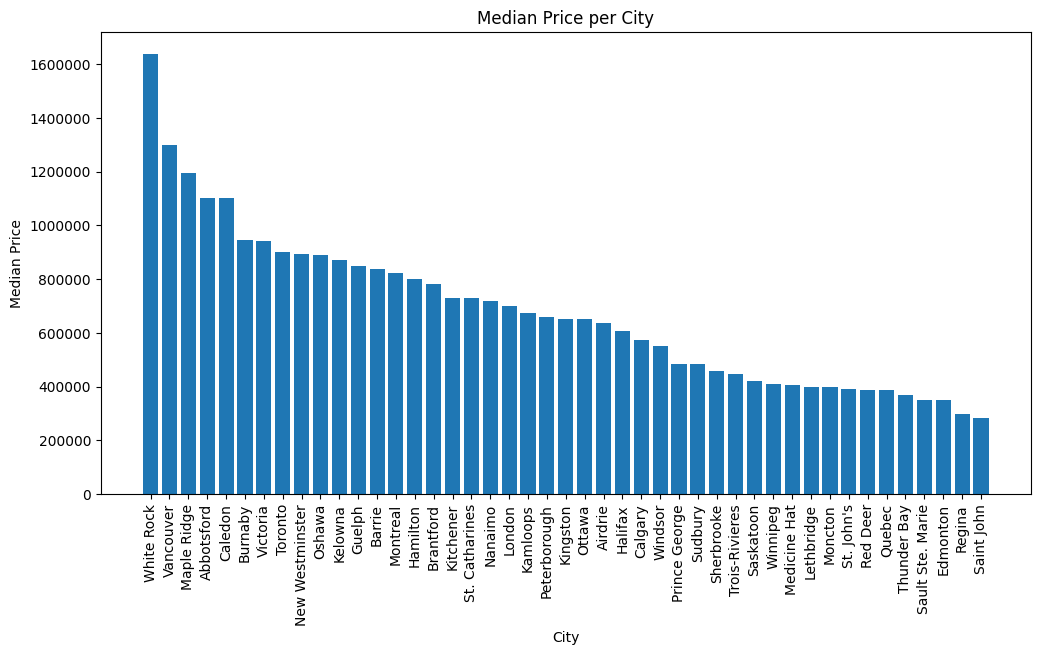

In [85]:
# Visualization 3: Median Price/Earnings per City
# Create a bar chart, showing the median house price per city

# Group data by city
city_grouped3 = df.groupby('City').agg(
    med_price=('Price', 'median')
    ).reset_index()

# Sort data
city_grouped3 = city_grouped3.sort_values(by='med_price', ascending=False)

# Plot data
plt.figure(figsize=(12, 6))
plt.bar(city_grouped3['City'], city_grouped3['med_price'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('City')
plt.ylabel('Median Price')
plt.title('Median Price per City')
plt.xticks(rotation=90)
plt.show()

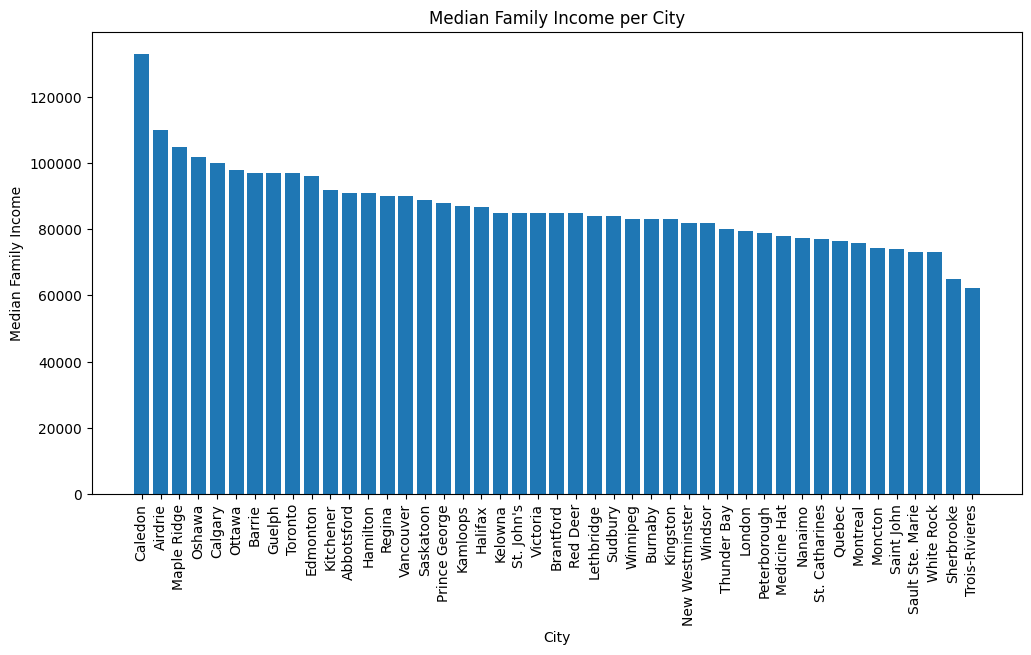

In [99]:
# Create a bar chart, showing the median family income per city

# Group data by city
city_income = df.groupby('City')['Median_Family_Income'].median().reset_index()

# Sort data
city_income = city_income.sort_values(by='Median_Family_Income', ascending=False)

# Plot data
plt.figure(figsize=(12, 6))
plt.bar(city_income['City'], city_income['Median_Family_Income'])
plt.xlabel('City')
plt.ylabel('Median Family Income')
plt.xticks(rotation=90)
plt.title('Median Family Income per City')
plt.show()

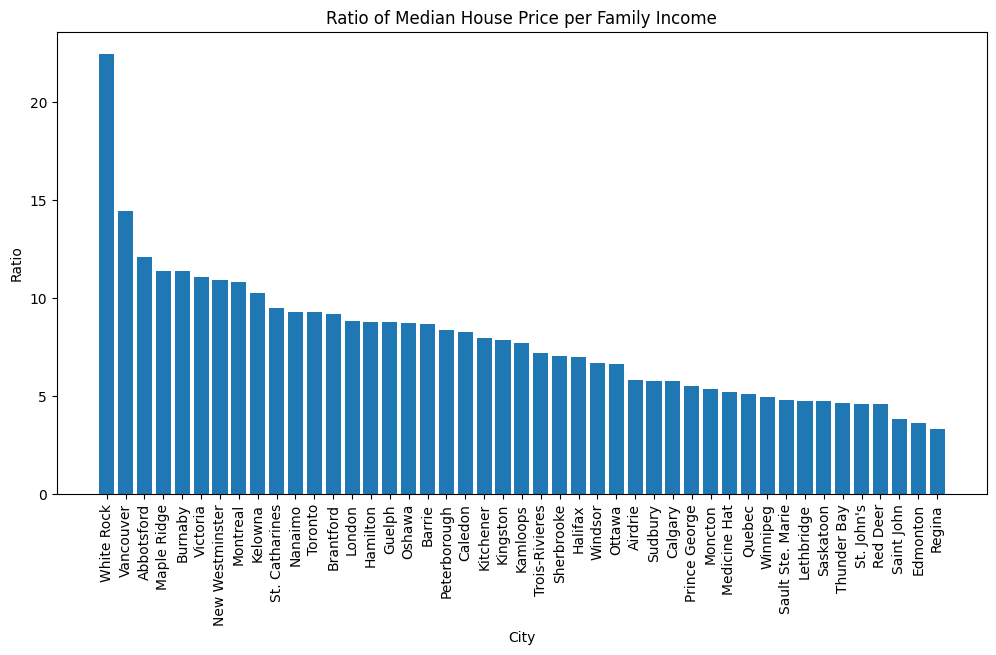

In [100]:
# Create a bar chart, showing the median price/earning per city

# Group data
city_stats = df.groupby('City').agg({
    'Price': 'median',
    'Median_Family_Income': 'median'
}).reset_index()

# Make ratio
city_stats['ppi'] = city_stats['Price'] / city_stats['Median_Family_Income']

# Sort data
city_stats = city_stats.sort_values('ppi', ascending=False)

# Plot data
plt.figure(figsize=(12, 6))
plt.bar(city_stats['City'], city_stats['ppi'])
plt.xlabel('City')
plt.ylabel('Ratio')
plt.xticks(rotation=90)
plt.title('Ratio of Median House Price per Family Income')
plt.show()

In [98]:
print(city_stats[['City', 'Price', 'Median_Family_Income', 'ppi']])

                City        Price  Median_Family_Income   ppi
42        White Rock 1,638,000.00             73,000.00 22.44
40         Vancouver 1,298,000.00             90,000.00 14.42
0         Abbotsford 1,100,000.00             91,000.00 12.09
17       Maple Ridge 1,196,500.00            105,000.00 11.40
4            Burnaby   943,800.00             83,000.00 11.37
41          Victoria   939,900.00             85,000.00 11.06
22   New Westminster   895,000.00             82,000.00 10.91
20          Montreal   821,750.00             76,000.00 10.81
12           Kelowna   869,650.00             85,000.00 10.23
34    St. Catharines   728,444.00             77,000.00  9.46
21           Nanaimo   719,900.00             77,500.00  9.29
38           Toronto   899,000.00             97,000.00  9.27
3          Brantford   779,900.00             85,000.00  9.18
16            London   699,900.00             79,500.00  8.80
10          Hamilton   799,000.00             91,000.00  8.78
8       

c:\Users\micha\anaconda3\envs\datacourse\Lib\site-packages\matplotlib\axes\_axes.py:6895: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


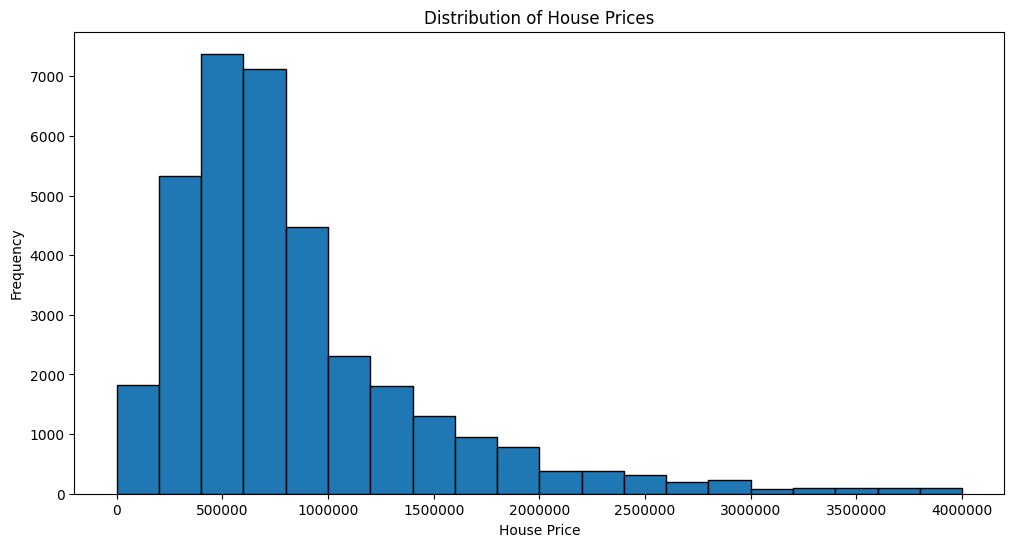

In [93]:
# Visualization 4: Distribution of House Prices

# Create a histogram, showing the distibutions of house prices

# Make bins
bins = list(range(0, 4000000 + 1, 200000))  
bins.append(float('inf'))

# Plot data
plt.figure(figsize=(12, 6))
plt.hist(df['Price'], bins=bins, edgecolor='black')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

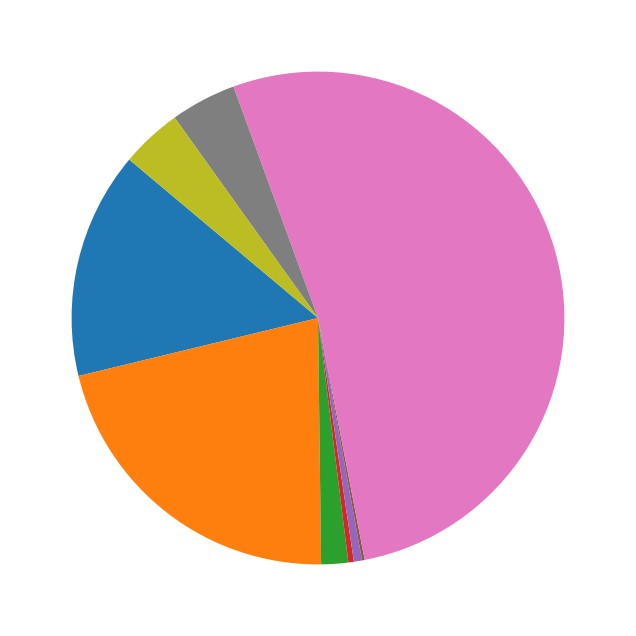

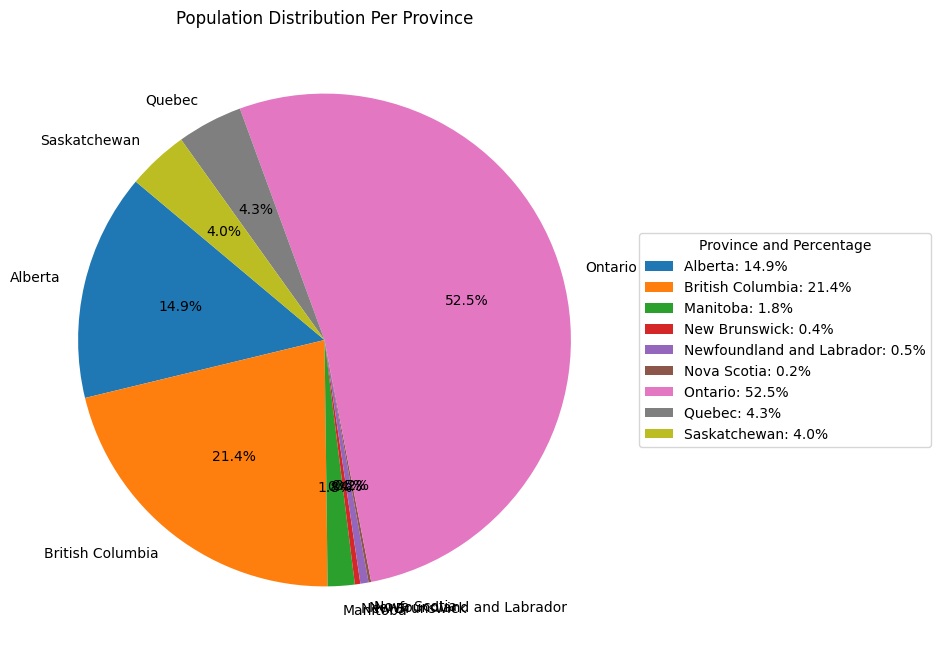

In [116]:
# Visual 5: Population Pie Chart

province_population = df.groupby('Province')['Population'].sum()

# Calculate total population
total_population = province_population.sum()

# Calculate percentages for each province
percentages = (province_population / total_population) * 100

# Create the pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    province_population,
    labels=province_population.index,  # Use province names as labels
    autopct='%1.1f%%',  # Display percentages on the chart
    startangle=140  # Adjust the starting angle for the pie chart
)



# Create a legend
legend_labels = [f'{province}: {percent:.1f}%' for province, percent in zip(province_population.index, percentages)]
plt.legend(
    legend_labels,
    title='Province and Percentage',
    loc='center left',  # Position the legend on the left side
    bbox_to_anchor=(1, 0.5),
    prop={'size': 10}  # Adjust legend text size
)

plt.title('Population Distribution Per Province')
plt.show()